C:\Users\aparn\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aparn\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aparn\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\aparn\anaconda3\envs\tensorflow\lib\site-packages

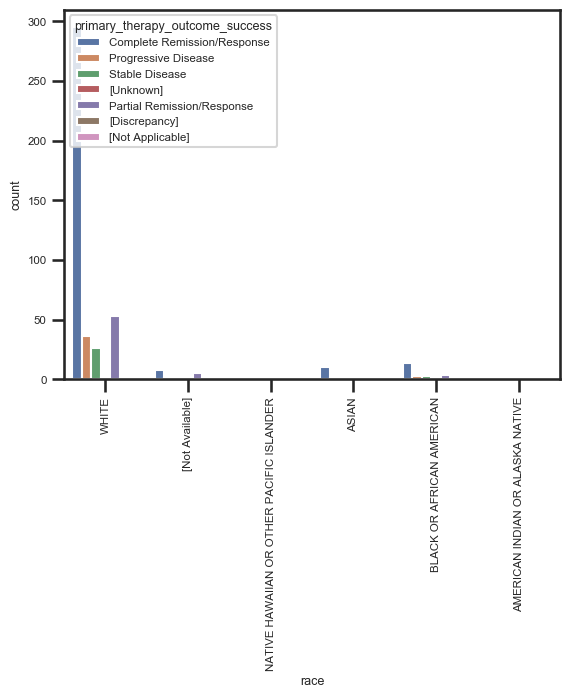

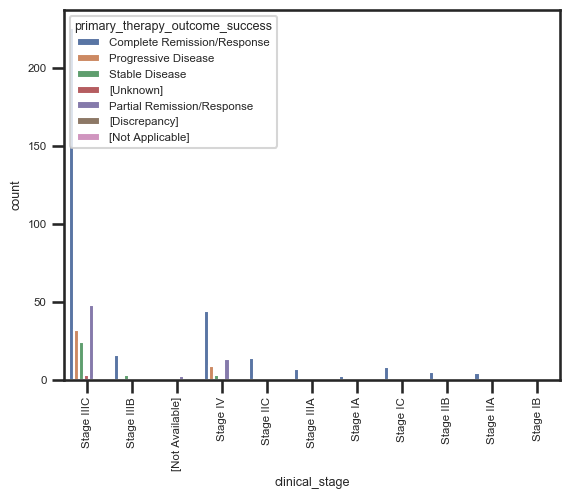

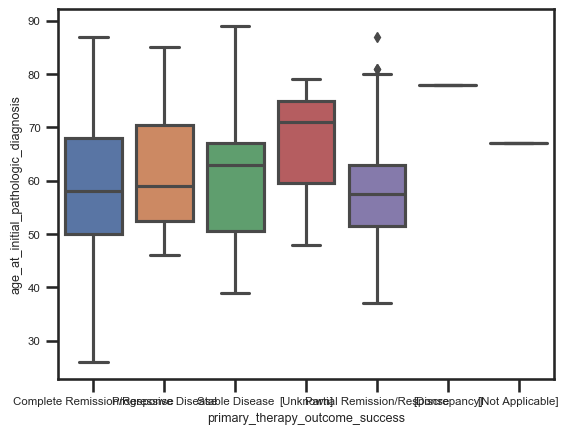

,primary_therapy_outcome_success,jewish_origin,history_of_neoadjuvant_treatment,age_at_initial_pathologic_diagnosis,AMERICAN INDIAN OR ALASKA NATIVE,ASIAN,BLACK OR AFRICAN AMERICAN,NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,WHITE,Cytology (e.g. Peritoneal or pleural fluid),...,9,OY,VG,WR,Omentum,Ovary,Peritoneum ovary,radiation_NO,radiation_YES,pharma_YES
0,Complete Remission/Response,0,0,78,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
1,Complete Remission/Response,0,0,55,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,Complete Remission/Response,0,0,85,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,Progressive Disease,0,0,80,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Progressive Disease,0,0,72,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,NaN,0,0,51,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
583,NaN,0,0,74,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
584,NaN,0,0,40,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,0,1
585,NaN,0,0,53,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [1]:
#imports
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import shap
from sklearn.preprocessing import LabelEncoder

#seaborn set up
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=0.5)
sns.set_style('ticks')

#warnings
pd.options.mode.chained_assignment = None  # default='warn'

#readins
datasetplots1 = pd.read_csv("0abf0e45-07c1-4ac2-b27c-2a4f3f460364.csv")
datasetplots2 = pd.read_csv("5ea3f385-7f0b-4332-881b-a3a30b399623.csv")
datasetplots3 = pd.read_csv("09a4994f-d50e-423c-895e-0be2d6dd5762.csv")
datasetplots4 = pd.read_csv("30c149ac-9ac2-4f51-88a3-68bb4afb50a9.csv")

#ds1 + output set up
ds1 = datasetplots1[datasetplots1['primary_therapy_outcome_success'] !="[Not Available]"]
output = ds1.drop(columns=['bcr_patient_uuid', 'bcr_followup_barcode', 'bcr_followup_uuid', 'form_completion_date', 'followup_case_report_form_submission_reason', 'lost_follow_up', 'radiation_therapy', 'postoperative_rx_tx', 'vital_status', 'days_to_last_followup', 'days_to_death', 'person_neoplasm_cancer_status', 'new_tumor_event_after_initial_treatment', 'followup_treatment_success', 'eastern_cancer_oncology_group', 'karnofsky_performance_score', 'performance_status_scale_timing'])
output = output.drop_duplicates(subset='bcr_patient_barcode', keep="last")

#datasetplots4 set up
mergewith = datasetplots4.drop(columns=['bcr_patient_uuid', 'form_completion_date', 'tissue_prospective_collection_indicator', 'tissue_retrospective_collection_indicator', 'gender', 'days_to_birth', 'ethnicity', 'other_dx', 'year_of_initial_pathologic_diagnosis', 'init_pathology_dx_method_other', 'vital_status', 'days_to_last_followup', 'days_to_death', 'person_neoplasm_cancer_status', 'residual_tumor', 'tumor_residual_disease', 'karnofsky_performance_score', 'eastern_cancer_oncology_group', 'performance_status_scale_timing', 'radiation_therapy', 'postoperative_rx_tx', 'primary_therapy_outcome_success', 'days_to_tumor_progression', 'new_tumor_event_after_initial_treatment', 'clinical_M', 'clinical_N', 'clinical_T', 'days_to_initial_pathologic_diagnosis', 'days_to_patient_progression_free', 'disease_code', 'extranodal_involvement', 'histological_type', 'icd_o_3_histology', 'icd_o_3_site', 'informed_consent_verified', 'pathologic_M', 'pathologic_N', 'pathologic_T', 'pathologic_stage', 'project_code', 'stage_other', 'system_version'])
mergewith = mergewith.drop_duplicates(subset = 'bcr_patient_barcode', keep = 'last')

#datasetplots2 set up
ds2 = datasetplots2.drop_duplicates(subset ='bcr_patient_barcode', keep="last")
ds2 = ds2.drop(columns=['bcr_patient_uuid', 'bcr_followup_barcode', 'days_to_new_tumor_event_after_initial_treatment', 'progression_determined_by', 'progression_determined_by_notes', 'days_to_new_tumor_event_additional_surgery_procedure', 'new_neoplasm_event_type', 'new_tumor_event_additional_surgery_procedure'])

#dataset mergers
dffinal = output.merge(mergewith, on='bcr_patient_barcode', how='outer')
dftest = dffinal.merge(ds2, on='bcr_patient_barcode', how='outer')

#countplots - race
raceplot = sns.countplot(x='race',data=dftest, hue='primary_therapy_outcome_success')
raceplot.set_xticklabels(raceplot.get_xticklabels(),rotation = 90)
plt.show()

#countplots - stage
stageplot = sns.countplot(x='clinical_stage',data=dftest, hue='primary_therapy_outcome_success')
stageplot.set_xticklabels(stageplot.get_xticklabels(),rotation = 90)
plt.show()

#jewish origin
dftest['jewish_origin'] = dftest['jewish_origin'].replace({"[Not Evaluated]" : "[Not Available]", "[Unknown]":"[Not Available]"})
dftest['jewish_origin'] = dftest['jewish_origin'].replace({'[Not Available]' : 0, 'ASHKENAZI' : 1})

#race
race = pd.get_dummies(dftest['race'])
dftest = dftest.drop('race', axis=1)
dftest = dftest.join(race)
dftest.rename(columns={'[Not Available]':'race_[Not Available]'}, inplace=True)

#neoadjuvant treatment
dftest['history_of_neoadjuvant_treatment'].replace({"No":0, "Yes":1}, inplace=True)

#diagnosis method
method = pd.get_dummies(dftest['initial_pathologic_diagnosis_method'])
dftest = dftest.drop('initial_pathologic_diagnosis_method', axis=1)
dftest = dftest.join(method)
dftest.rename(columns={'[Not Available]':'method_[Not Available]'}, inplace=True)

# histologic grade
grade = pd.get_dummies(dftest['neoplasm_histologic_grade'])
dftest = dftest.drop('neoplasm_histologic_grade', axis=1)
dftest = dftest.join(grade)
dftest.rename(columns={'[Not Available]':'grade_[Not Available]'}, inplace=True)
dftest

#venous invasion
venous = pd.get_dummies(dftest['venous_invasion'])
dftest = dftest.drop('venous_invasion', axis=1)
dftest = dftest.join(venous)
dftest.rename(columns={'NO':'venous_NO'}, inplace=True)
dftest.rename(columns={'YES':'venous_YES'}, inplace=True)
dftest.rename(columns={'[Not Available]':'venous_[Not Available]'}, inplace=True)
dftest.rename(columns={'[Unknown]':'venous_[Unknown]'}, inplace=True)

#lymphatic invasion
lymphatic = pd.get_dummies(dftest['lymphatic_invasion'])
dftest = dftest.drop('lymphatic_invasion', axis=1)
dftest = dftest.join(lymphatic)
dftest.rename(columns={'NO':'lymphatic_NO'}, inplace=True)
dftest.rename(columns={'YES':'lymphatic_YES'}, inplace=True)
dftest.rename(columns={'[Not Available]':'lymphatic_[Not Available]'}, inplace=True)
dftest.rename(columns={'[Unknown]':'lymphatic_[Unknown]'}, inplace=True)

#anatomic neoplasm subdivision
subdivision = pd.get_dummies(dftest['anatomic_neoplasm_subdivision'])
dftest = dftest.drop('anatomic_neoplasm_subdivision', axis=1)
dftest = dftest.join(subdivision)
dftest.rename(columns={'[Not Available]':'subdivision_[Not Available]'}, inplace=True)

#stage
stage = pd.get_dummies(dftest['clinical_stage'])
dftest = dftest.drop('clinical_stage', axis=1)
dftest = dftest.join(stage)
dftest.rename(columns={'[Not Available]':'stage_[Not Available]'}, inplace=True)

#icd (insurance code)
icd = pd.get_dummies(dftest['icd_10'])
dftest = dftest.drop('icd_10', axis=1)
dftest = dftest.join(icd)

#tissue source site
source = pd.get_dummies(dftest['tissue_source_site'])
dftest = dftest.drop('tissue_source_site', axis=1)
dftest = dftest.join(source)

#tumor tissue site
tumor_tissue = pd.get_dummies(dftest['tumor_tissue_site'])
dftest = dftest.drop('tumor_tissue_site', axis=1)
dftest = dftest.join(tumor_tissue)

#additional radiation therapy
radiation = pd.get_dummies(dftest['additional_radiation_therapy'])
dftest = dftest.drop('additional_radiation_therapy', axis=1)
dftest = dftest.join(radiation)
dftest.rename(columns={'[Not Available]':'radiation_[Not Available]'}, inplace=True)
dftest.rename(columns={'NO':'radiation_NO'}, inplace=True)
dftest.rename(columns={'YES':'radiation_YES'}, inplace=True)
dftest

#additional pharma therapy
pharma = pd.get_dummies(dftest['additional_pharmaceutical_therapy'])
dftest = dftest.drop('additional_pharmaceutical_therapy', axis=1)
dftest = dftest.join(pharma)
dftest.rename(columns={'[Not Available]':'pharma_[Not Available]'}, inplace=True)
dftest.rename(columns={'YES':'pharma_YES'}, inplace=True)

#dropping all the ID columns (before classification)
dftest = dftest.drop(columns=['bcr_patient_barcode'])
dftest = dftest.drop(columns=['patient_id'])
dftest = dftest.drop(columns=['race_[Not Available]', 'method_[Not Available]', 'grade_[Not Available]', 'venous_[Not Available]', 'venous_[Unknown]'])
dftest = dftest.drop(columns=['lymphatic_[Not Available]', 'lymphatic_[Unknown]', 'subdivision_[Not Available]', 'stage_[Not Available]'])
dftest = dftest.drop(columns=['radiation_[Not Available]', 'pharma_[Not Available]'])


#plots - age
alloutcomesage = sns.boxplot(x='primary_therapy_outcome_success', y='age_at_initial_pathologic_diagnosis', data=dftest)
plt.show()

#print
dftest

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [3]:
#binary outcome (temporary)
dftest['success'] = np.where(dftest.primary_therapy_outcome_success.str.contains("Remission") | dftest.primary_therapy_outcome_success.str.contains("Disease"), 1, 0)
dftest = dftest.drop("primary_therapy_outcome_success", axis=1)
agebox = sns.boxplot(x='success', y='age_at_initial_pathologic_diagnosis', data=dftest)

In [4]:
dftest['success'].value_counts()

1    466
0    121
Name: success, dtype: int64

In [5]:
#binary outcome variable defs
Y = dftest[['success']]
X = dftest.drop('success', axis=1)

#train/test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
y_test["success"].value_counts(normalize=True)

1    0.79096
0    0.20904
Name: success, dtype: float64

In [6]:
logit = LogisticRegression(solver="lbfgs", max_iter=1000, class_weight='balanced')
logit.fit(x_train.values, y_train.values.reshape(-1,))
y_pred = logit.predict(x_test)
accuracy_score(y_test, y_pred)

0.7401129943502824

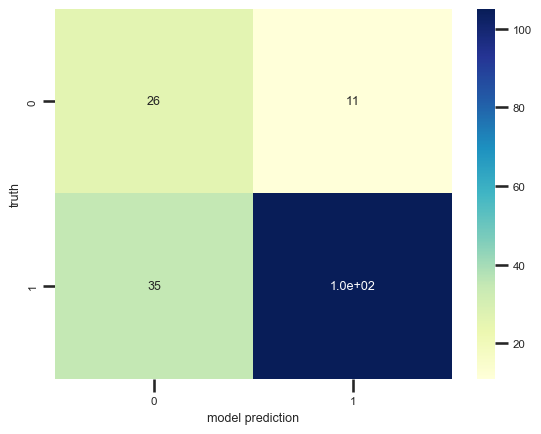

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.784


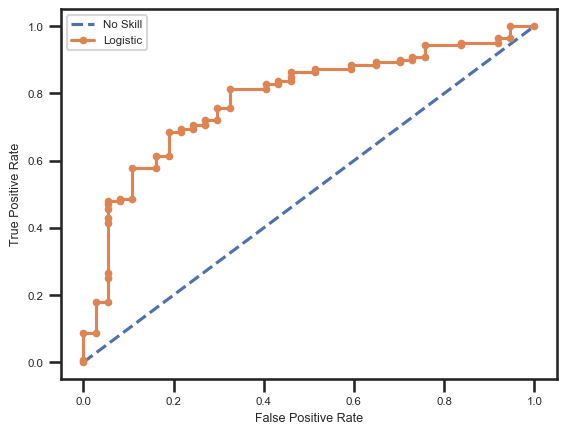

In [9]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logit.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [10]:
#neural net defs
model = Sequential()
model.add(Dense(6, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
#neural net compile/fit
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split = 0.1, class_weight= 'balanced', epochs=45, batch_size=14, verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



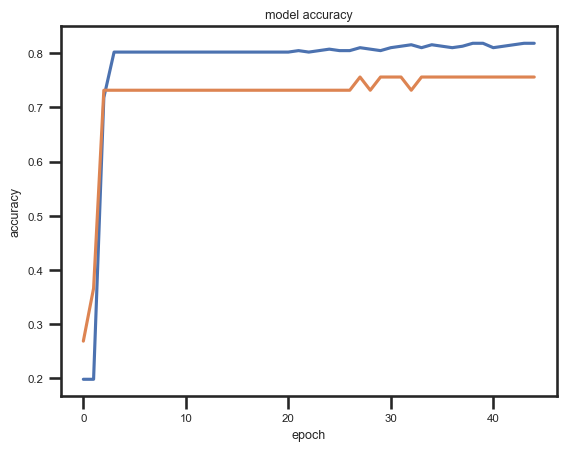

In [13]:
#model accuracy plot
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

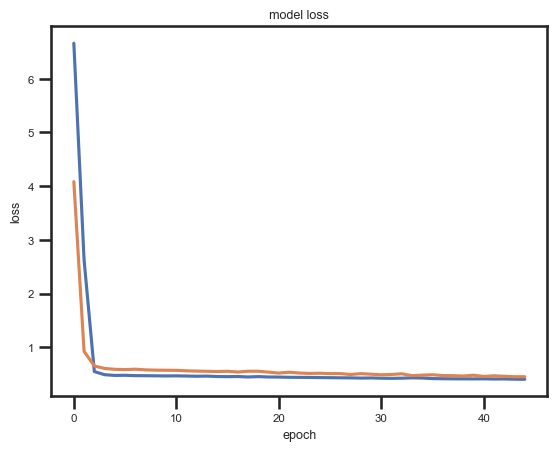

In [14]:
#model loss plot
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

In [15]:
#model eval
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.4493095005972911, 0.7966101765632629]

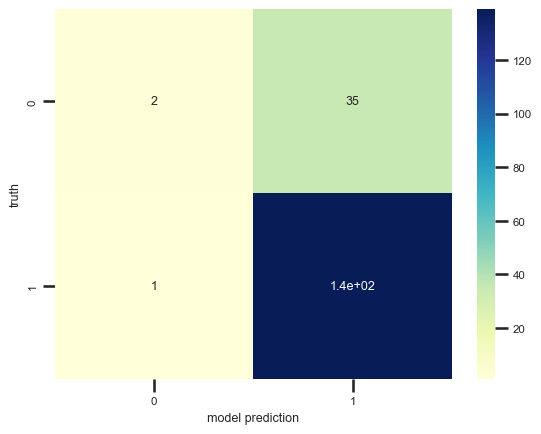

In [16]:
#nn cnf matrix
predictions = model.predict(x_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(predictions))
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [17]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

In [18]:
#train/test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_test["success"].value_counts(normalize=True)

1    0.864407
0    0.135593
Name: success, dtype: float64

Score for fold 1: loss of 0.4984316664226985; accuracy of 74.57627058029175%


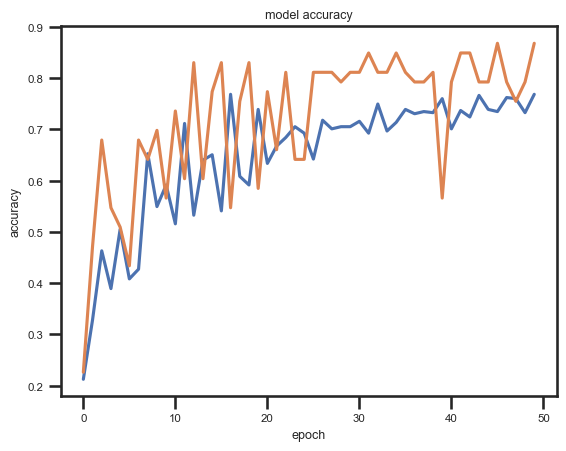

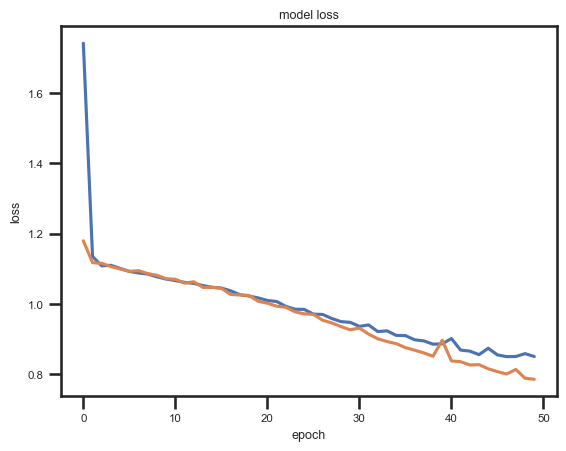

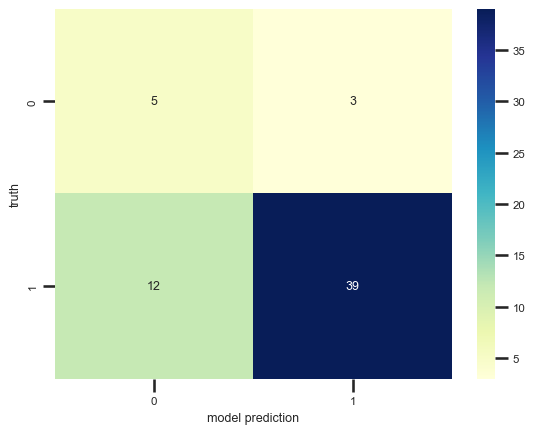

Score for fold 2: loss of 0.6575628700902907; accuracy of 61.01694703102112%


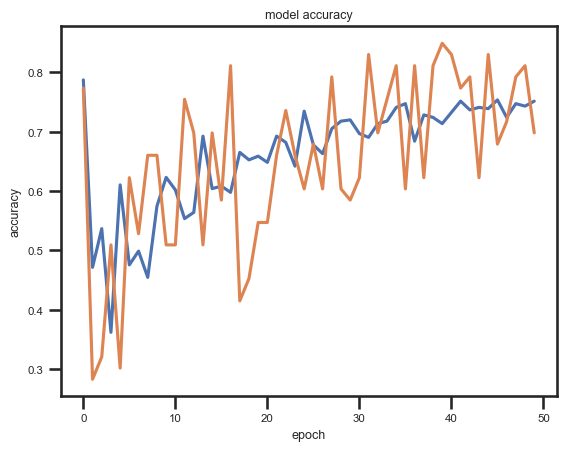

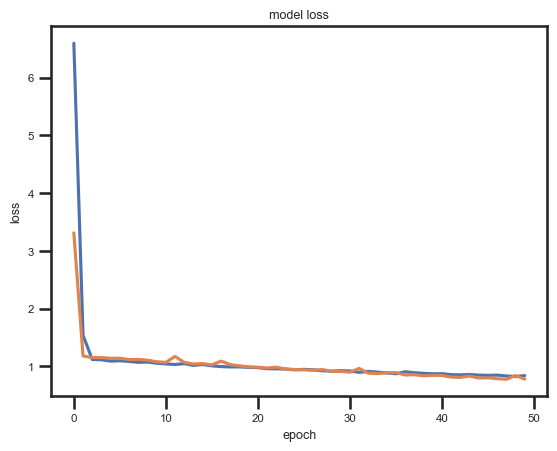

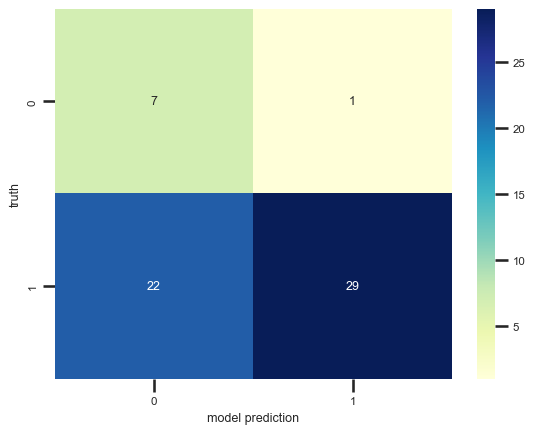

Score for fold 3: loss of 0.42802845724558425; accuracy of 79.6610176563263%


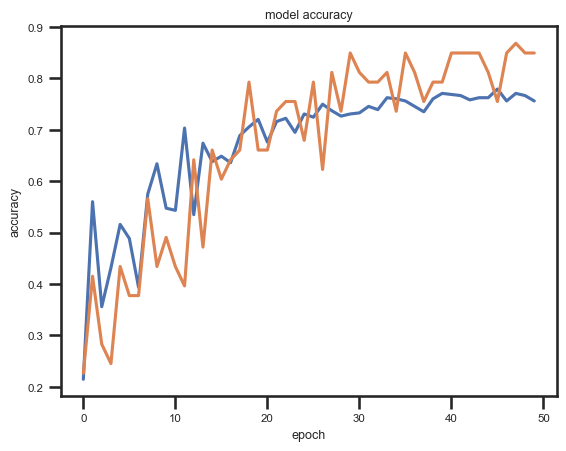

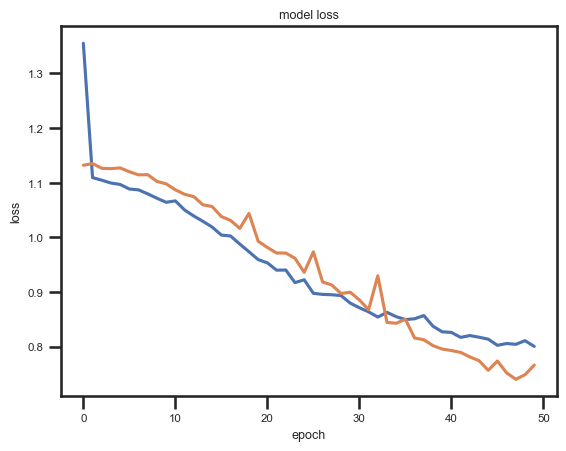

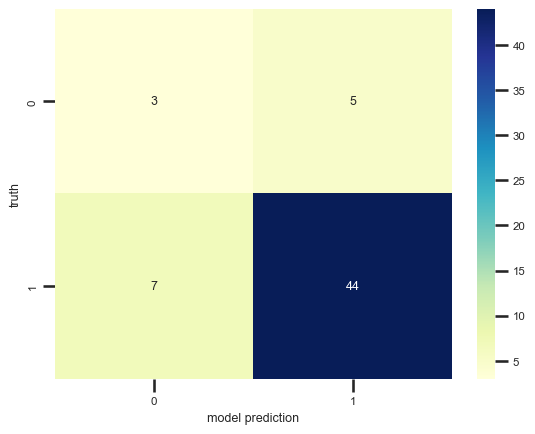

Score for fold 4: loss of 0.598055414224075; accuracy of 72.88135886192322%


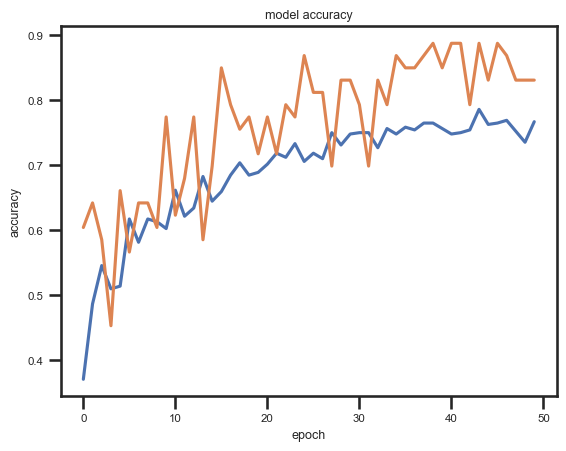

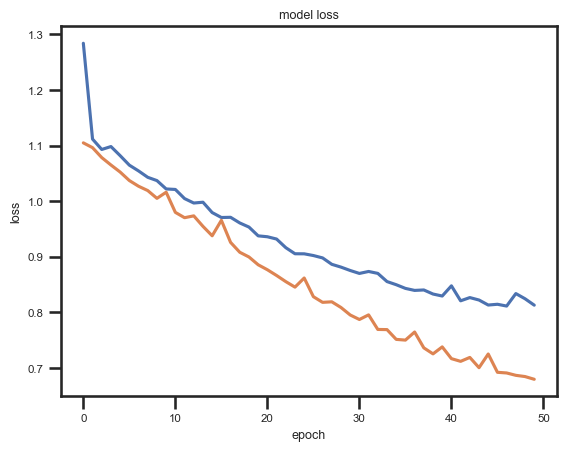

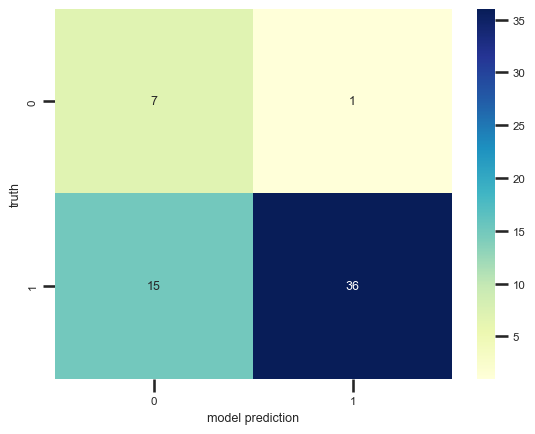

Score for fold 5: loss of 0.49431895098443757; accuracy of 76.27118825912476%


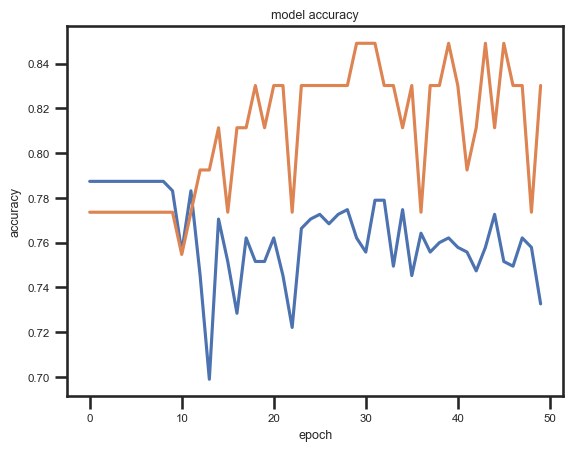

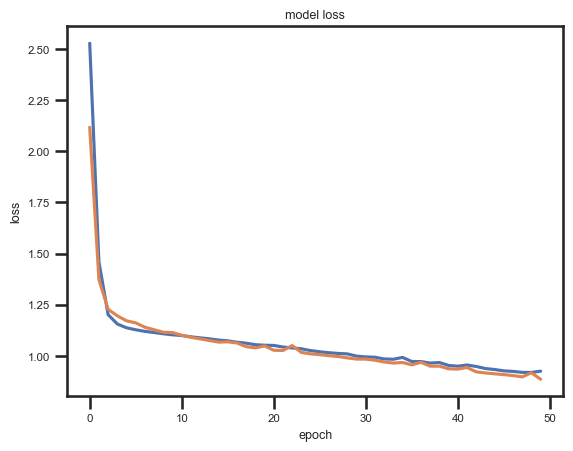

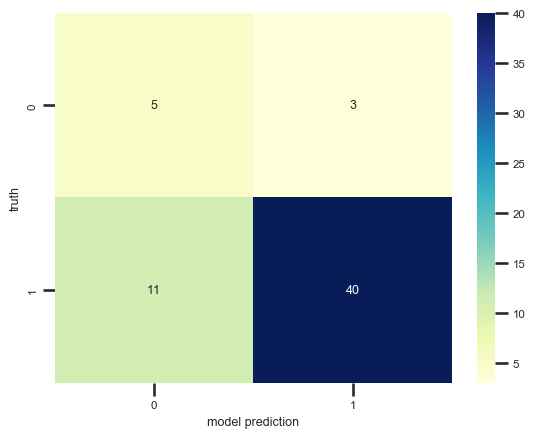

> Accuracy: 72.88135647773743 (+- 6.341793287973726)
> Loss: 0.5352794717934172


In [19]:
fold_no = 1

acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_split = 0.1, class_weight= {0:3.85123966942, 1:1}, epochs=50, batch_size=14, verbose=0)
    
    scores = model.evaluate(x_test, y_test, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    #model accuracy plot
    plt.plot(history.history["accuracy"])
    plt.plot(history.history['val_accuracy'])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.show()
    
    #model loss plot
    plt.plot(history.history["loss"])
    plt.plot(history.history['val_loss'])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.show()

    predictions = model.predict(x_test)
    confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(predictions))
    sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
    plt.xlabel("model prediction")
    plt.ylabel("truth")
    plt.show()
    
  
    # Increase fold number
    fold_no = fold_no + 1
    
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')


In [20]:
explainer = shap.KernelExplainer(model.predict, shap.sample(x_train, 100))
shap_values = explainer.shap_values(x_test, nsamples=100)

  0%|          | 0/59 [00:00<?, ?it/s]

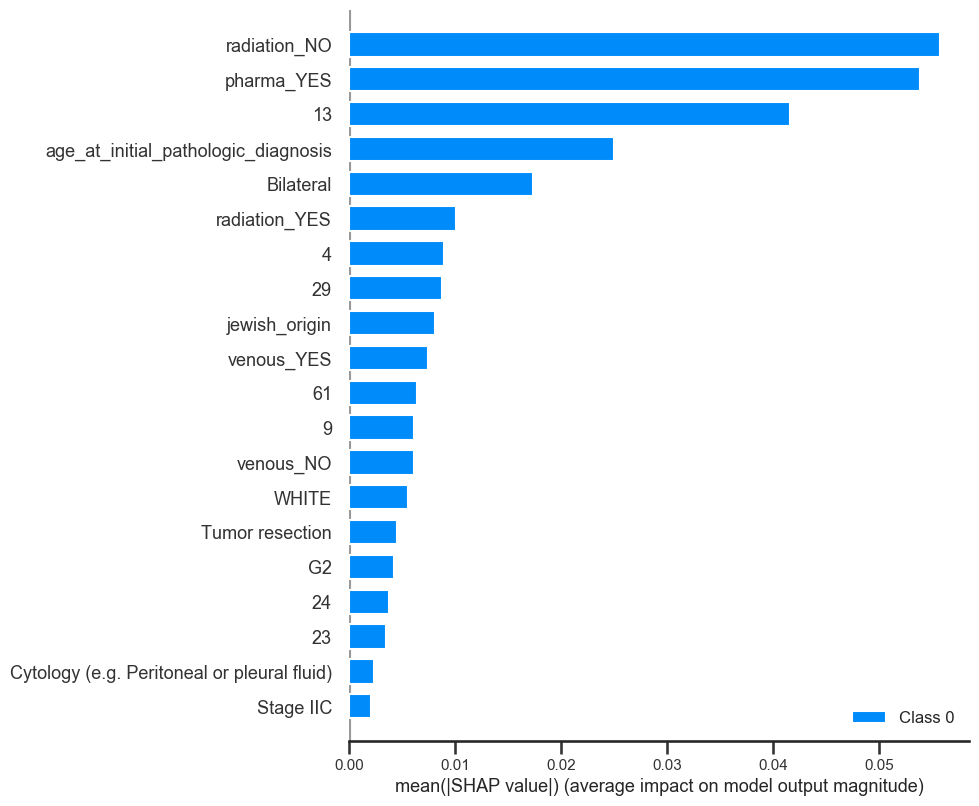

In [21]:
shap.summary_plot(shap_values, X)

In [22]:
print(shap_values)

[array([[-0.0072755 ,  0.        , -0.05311518, ..., -0.05836914,
         0.        , -0.05905766],
       [ 0.        ,  0.        ,  0.        , ...,  0.05931298,
         0.        ,  0.04524618],
       [ 0.        ,  0.        ,  0.07482617, ...,  0.0551572 ,
        -0.0098782 ,  0.0426547 ],
       ...,
       [ 0.        ,  0.        ,  0.00670715, ...,  0.05617821,
         0.        ,  0.06110961],
       [ 0.        ,  0.        , -0.04646291, ...,  0.04586145,
         0.        ,  0.02875537],
       [ 0.        ,  0.        ,  0.        , ...,  0.06126853,
         0.        ,  0.05541258]])]


In [23]:
shap.initjs()

In [24]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], 
                pd.DataFrame(x_test).iloc[0,:])

In [25]:
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test)

In [26]:
from sklearn import datasets
from sklearn import svm